# Task:
Exercises from Chapter 4: Classification in An Introduction to Statistical Learning with Applications in Python (Springer, 2023), Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani:

Exercises: 13, 14

13. This question should be answered using the Weekly data set, which is part of the ISLP package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1, 089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

In [1]:
import numpy as np
import pandas as pd
from matplotlib .pyplot import subplots
import statsmodels .api as sm
from ISLP import load_data
from ISLP.models import ( ModelSpec as  MS ,
summarize )
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn. discriminant_analysis import \
( LinearDiscriminantAnalysis as LDA ,
QuadraticDiscriminantAnalysis as QDA)
from sklearn. naive_bayes import GaussianNB
from sklearn. neighbors import KNeighborsClassifier
from sklearn. preprocessing import StandardScaler
from sklearn. model_selection import train_test_split

Weekly = load_data('Weekly')

(a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

In [2]:
Weekly.corr(numeric_only=True)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


<Axes: >

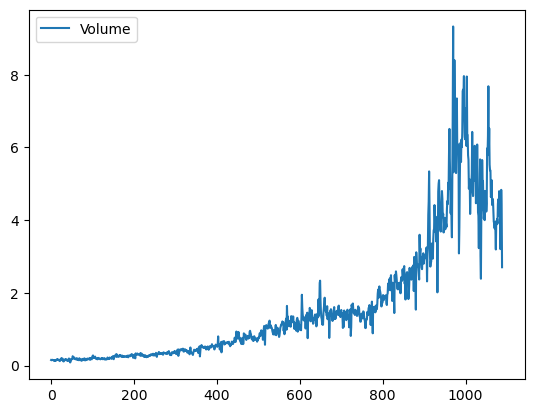

In [3]:
Weekly.plot(y='Volume')

(b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [4]:
allvars = Weekly.columns.drop(['Today', 'Direction', 'Year']) 
design = MS(allvars) 
X = design.fit_transform(Weekly) 
y = Weekly.Direction == 'Up' 
glm = sm.GLM(y,X,family = sm.families.Binomial()) 
results = glm.fit() 
summarize(results)

,coef,std err,z,P>|z|
intercept,0.2669,0.086,3.106,0.002
Lag1,-0.0413,0.026,-1.563,0.118
Lag2,0.0584,0.027,2.175,0.030
Lag3,-0.0161,0.027,-0.602,0.547
Lag4,-0.0278,0.026,-1.050,0.294
Lag5,-0.0145,0.026,-0.549,0.583
Volume,-0.0227,0.037,-0.616,0.538


(c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [5]:
probs = results.predict() 
labels = np.array(['Down']*1089) 
labels[probs>0.5] = "Up" 
confusion_table(labels, Weekly.Direction)

Truth,Down,Up
Predicted,,
Down,54,48
Up,430,557


In [6]:
(557+54)/1089, np.mean(labels == Weekly.Direction)

(0.5610651974288338, 0.5610651974288338)

(d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010). 

In [7]:
train = (Weekly.Year <= 2008) 
Weekly_train = Weekly.loc[train] 
Weekly_test = Weekly.loc[~train] 
Weekly_test.shape

(104, 9)

In [8]:
X_train, X_test = X.loc[train], X.loc[~train]
y_train, y_test = y.loc[train], y.loc[~train]
model = MS(['Lag2']).fit(Weekly)
X = model.transform(Weekly)
X_train, X_test = X.loc[train], X.loc[~train]
glm_train = sm.GLM(y_train,
                   X_train,
                   family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=X_test)
D = Weekly.Direction
L_train, L_test = D.loc[train], D.loc[~train]
labels = np.array(['Down']*104)
labels[probs>0.5] = 'Up'
confusion_table(labels, L_test)

Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


In [9]:
np.mean(labels == L_test), np.mean(labels != L_test)

(0.625, 0.375)

(e) Repeat (d) using LDA. 

In [10]:
lda = LDA(store_covariance=True)
X_train, X_test = [M.drop(columns=['intercept'])
                   for M in [X_train, X_test]]
lda.fit(X_train, L_train)
lda_pred = lda.predict(X_test)
confusion_table(lda_pred, L_test)

Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


In [11]:
np.mean(lda_pred == L_test), np.mean(lda_pred != L_test)

(0.625, 0.375)

(f) Repeat (d) using QDA. 

In [12]:
qda = QDA(store_covariance=True)
qda.fit(X_train, L_train)
qda_pred = qda.predict(X_test)
confusion_table(qda_pred, L_test)

Truth,Down,Up
Predicted,,
Down,0,0
Up,43,61


In [13]:
np.mean(qda_pred == L_test)

0.5865384615384616

(g) Repeat (d) using KNN with K = 1. 

In [14]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, L_train)
knn_pred = knn.predict(X_test)
confusion_table(knn_pred, L_test)

Truth,Down,Up
Predicted,,
Down,22,31
Up,21,30


In [15]:
np.mean(knn_pred == L_test)

0.5

(h) Repeat (d) using naive Bayes. 

In [16]:
NB = GaussianNB()
NB.fit(X_train, L_train)
nb_labels = NB.predict(X_test)
confusion_table(nb_labels, L_test)

Truth,Down,Up
Predicted,,
Down,0,0
Up,43,61


In [17]:
np.mean(nb_labels == L_test)

0.5865384615384616

(j) Experiment with different combinations of predictors, includ- ing possible transformations and interactions, for each of the methods. Report the variables, method, and associated confu- sion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifier.

In [18]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, L_train)
knn_pred = knn.predict(X_test)
confusion_table(knn_pred, L_test)

Truth,Down,Up
Predicted,,
Down,16,20
Up,27,41


In [19]:
np.mean(knn_pred == L_test)

0.5480769230769231

14. In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set.

In [20]:
from ISLP import load_data
Auto = load_data('Auto')

(a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() method of the data frame. Note you may find it helpful to add a column mpg01 to the data frame by assignment. Assuming you have stored the data frame as Auto, this can be done as follows:

In [21]:
mpg_median = Auto['mpg'].median()

print(mpg_median)

Auto['mpg01'] = (Auto['mpg'] > mpg_median).astype(int)
Auto.head(20)

22.75


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
name,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1,0
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1,0
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1,0
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1,0
ford torino,17.0,8,302.0,140,3449,10.5,70,1,0
ford galaxie 500,15.0,8,429.0,198,4341,10.0,70,1,0
chevrolet impala,14.0,8,454.0,220,4354,9.0,70,1,0
plymouth fury iii,14.0,8,440.0,215,4312,8.5,70,1,0
pontiac catalina,14.0,8,455.0,225,4425,10.0,70,1,0


(b) Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

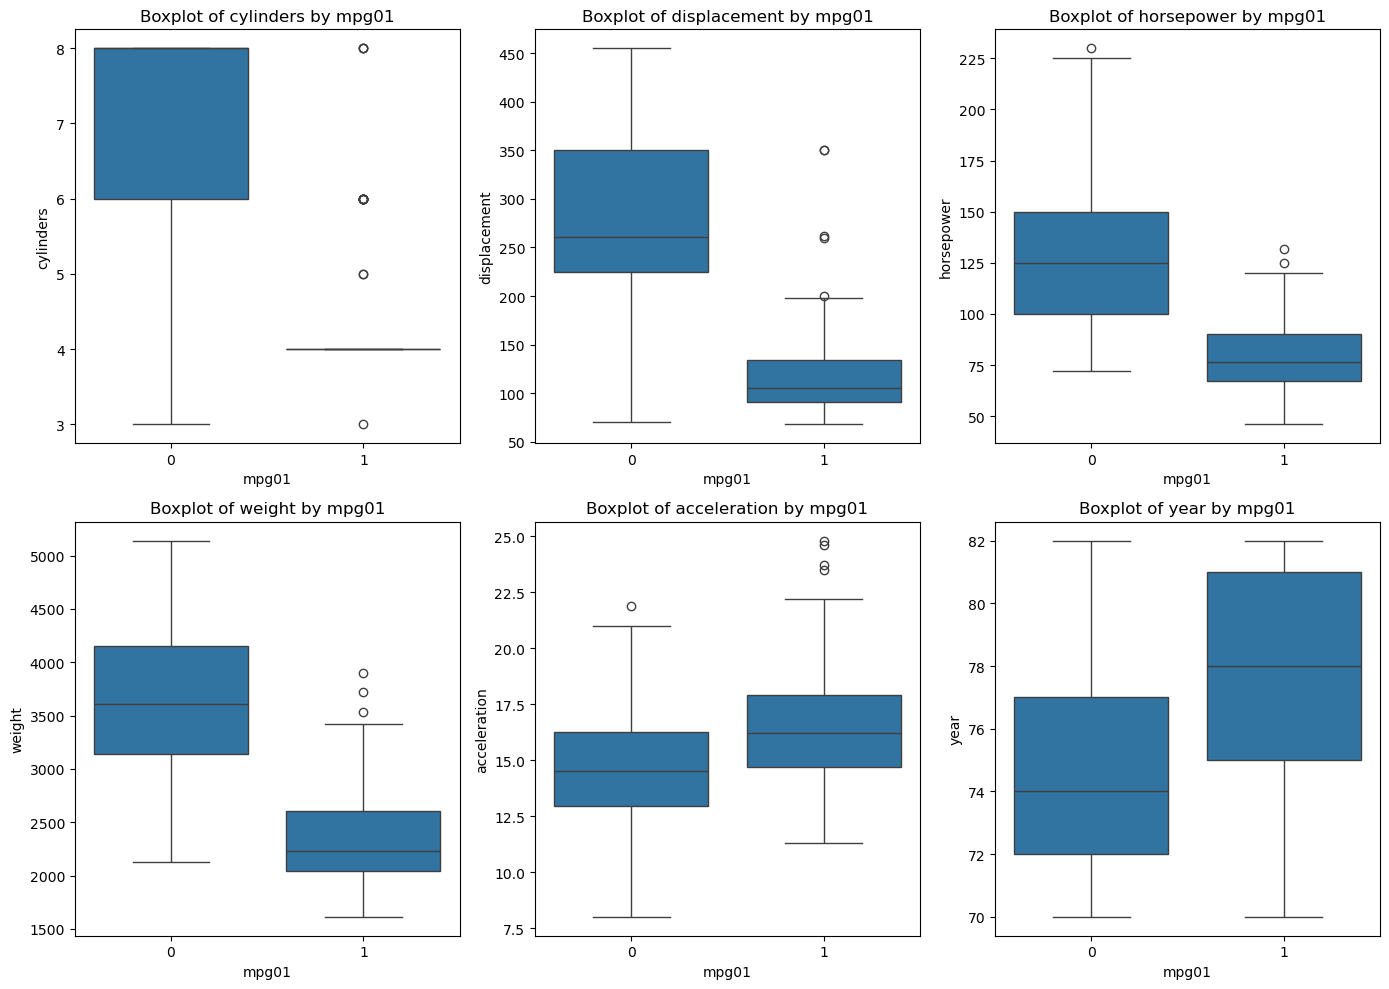

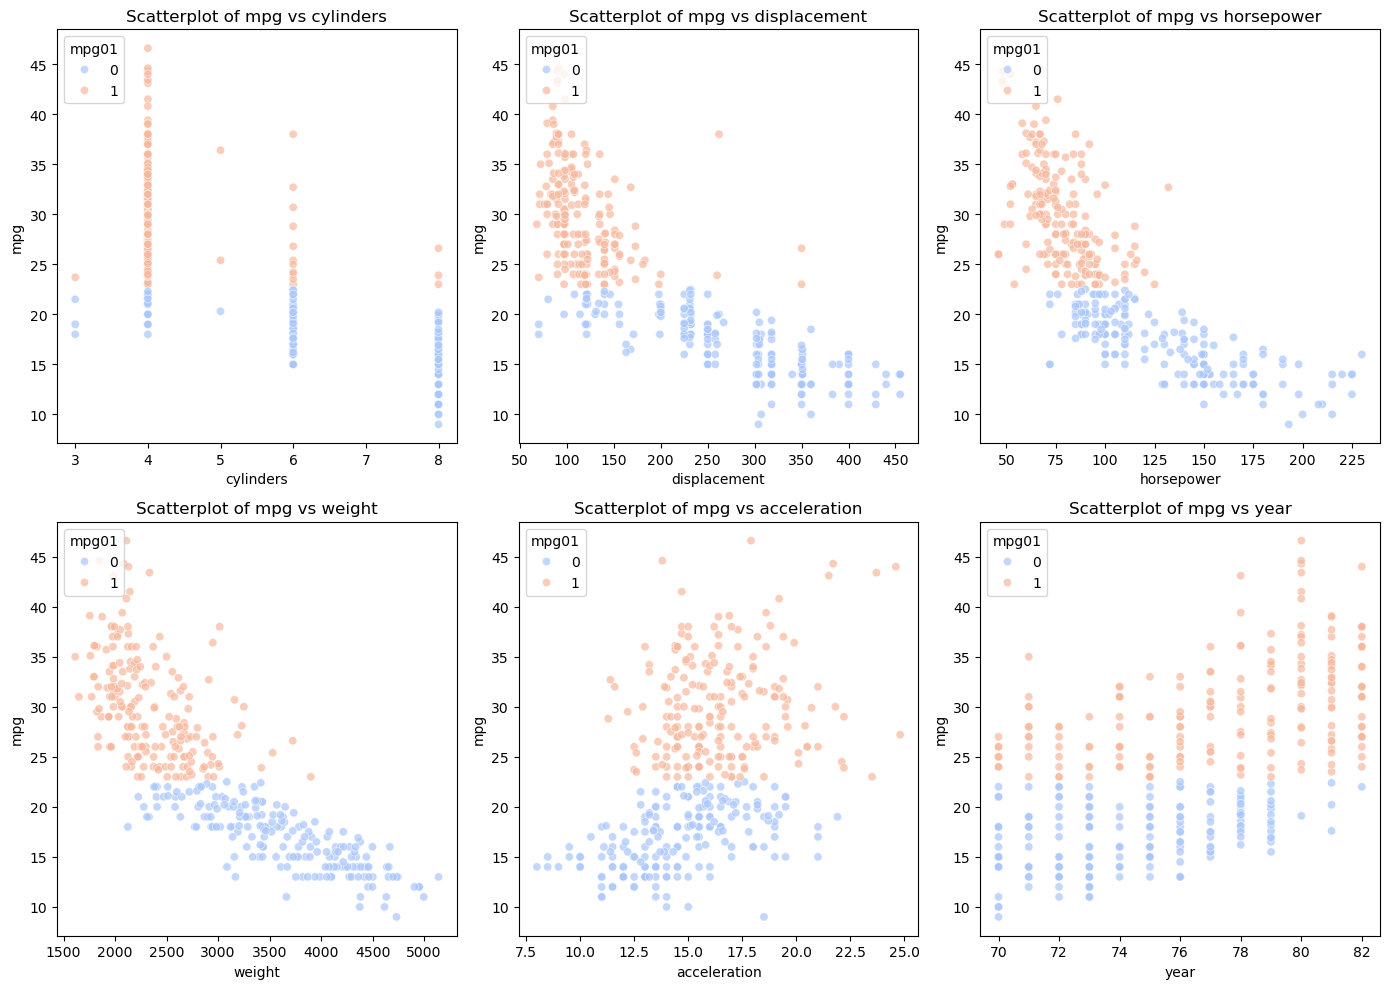

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']

plt.figure(figsize=(14, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=Auto, x='mpg01', y=feature)
    plt.title(f'Boxplot of {feature} by mpg01')
    plt.xlabel('mpg01')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=Auto, x=feature, y='mpg', hue='mpg01', palette='coolwarm', alpha=0.7)
    plt.title(f'Scatterplot of mpg vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('mpg')
    plt.legend(title='mpg01', loc='upper left')

plt.tight_layout()
plt.show()

(c) Split the data into a training set and a test set. 

In [23]:
from sklearn.model_selection import train_test_split

features = ['cylinders', 'displacement', 'horsepower', 'weight', 'year']

X = Auto[features]
y = Auto['mpg01']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

(d) Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)

test_error = 1 - accuracy_score(y_test, y_pred)
print("Błąd testowy modelu LDA:")
test_error

Błąd testowy modelu LDA:


0.11016949152542377

 (e) Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [25]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

y_pred_qda = qda.predict(X_test)

test_error_qda = 1 - accuracy_score(y_test, y_pred_qda)
print("Błąd testowy modelu QDA:")
test_error_qda

Błąd testowy modelu QDA:


0.14406779661016944

(f) Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [26]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

test_error_log_reg = 1 - accuracy_score(y_test, y_pred_log_reg)
print("Błąd testowy modelu regresji logistycznej:")
test_error_log_reg

Błąd testowy modelu regresji logistycznej:


0.15254237288135597

(g) Perform naive Bayes on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained? 

In [27]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

test_error_nb = 1 - accuracy_score(y_test, y_pred_nb)
print("Błąd testowy modelu naiwnego Bayesa:")
test_error_nb

Błąd testowy modelu naiwnego Bayesa:


0.1271186440677966

(h) Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that seemed most associated with mpg01 in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?

In [28]:
from sklearn.neighbors import KNeighborsClassifier

test_errors_knn = {}

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_pred_knn = knn.predict(X_test)
  
    test_error_knn = 1 - accuracy_score(y_test, y_pred_knn)
    test_errors_knn[k] = test_error_knn

print("Błąd testowy modelu KNN:")
test_errors_knn

Błąd testowy modelu KNN:


{1: 0.15254237288135597,
 2: 0.15254237288135597,
 3: 0.1271186440677966,
 4: 0.1271186440677966,
 5: 0.1610169491525424,
 6: 0.15254237288135597,
 7: 0.1694915254237288,
 8: 0.1694915254237288,
 9: 0.1694915254237288,
 10: 0.1610169491525424}